# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

print(os.path.exists('output/q6_cleaned_preencoding.csv'))
# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = pd.read_csv('output/q6_cleaned_preencoding.csv')
print(f"Loaded cleaned dataset with {len(df)} patients")
print("Unique site values:", df['site'].unique())

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

True
Loaded cleaned dataset with 10000 patients
Unique site values: ['Site B' 'Site A' 'Site C' 'Site D' 'Site E']


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [2]:
# TODO: Group by site
site_means = df.groupby('site')[['age', 'bmi', 'systolic_bp', 'diastolic_bp']].mean()
print(site_means)

              age        bmi  systolic_bp  diastolic_bp
site                                                   
Site A  56.364005  25.875183   117.354284     73.549508
Site B  62.401957  25.706681   117.130675     73.310140
Site C  57.312108  25.789583   117.978359     73.676397
Site D  63.491006  25.565682   117.943662     73.639437
Site E  57.064897  25.476502   117.503080     73.752567


In [3]:
# TODO: Count by intervention group
intervention_counts = df.groupby('intervention_group').size()
print(intervention_counts)

intervention_group
control        3337
treatment a    3321
treatment b    3342
dtype: int64


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [4]:
# TODO: Use summarize_by_group utility
site_summary = summarize_by_group(df, 'site')
print(site_summary)

           age                                                            bmi  \
         count       mean         std    min   25%   50%   75%    max   count   
site                                                                            
Site A  2956.0  56.364005  162.536292 -999.0  70.0  81.0  93.0  100.0  2873.0   
Site B  2453.0  62.401957  139.050180 -999.0  69.0  80.0  92.0  100.0  2350.0   
Site C  2073.0  57.312108  157.941868 -999.0  70.0  80.0  91.0  100.0  1968.0   
Site D  1501.0  63.491006  136.140058 -999.0  70.0  80.0  92.0  100.0  1422.0   
Site E  1017.0  57.064897  157.697644 -999.0  69.0  80.0  92.0  100.0   949.0   

                   ... adherence_pct        cholesterol_ratio            \
             mean  ...           75%    max             count      mean   
site               ...                                                    
Site A  25.875183  ...         75.00  100.0            2822.0  1.500565   
Site B  25.706681  ...         75.00  100.0        

## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [5]:
# TODO: Multiple aggregations
multi_agg = df.groupby('site').agg({
    'age': ['mean', 'std', 'min', 'max'],
    'bmi': ['mean', 'std'],
    'systolic_bp': ['mean', 'median']
})

display(multi_agg)


age                              bmi           systolic_bp  \
             mean         std  min  max       mean       std        mean   
site                                                                       
Site A  56.364005  162.536292 -999  100  25.875183  4.983102  117.354284   
Site B  62.401957  139.050180 -999  100  25.706681  5.017423  117.130675   
Site C  57.312108  157.941868 -999  100  25.789583  5.417217  117.978359   
Site D  63.491006  136.140058 -999  100  25.565682  5.881319  117.943662   
Site E  57.064897  157.697644 -999  100  25.476502  6.084532  117.503080   

               
       median  
site           
Site A  117.0  
Site B  117.0  
Site C  118.0  
Site D  118.0  
Site E  117.0

## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [6]:
# TODO: Intervention group comparisons

# Clean intervention_groups
df['intervention_group'] = df['intervention_group'].astype(str).str.lower().str.strip()
df['intervention_group'] = df['intervention_group'].str.replace(r'\s+', ' ', regex=True)
df['intervention_group'] = df['intervention_group'].replace({
    'contrl': 'control',
    'treatmen a': 'treatment a',
    'treatment  b': 'treatment b',
    'treatmenta': 'treatment a',
    'treatmentb': 'treatment b'
})

# Clean site column
df['site'] = df['site'].astype(str).str.upper().str.strip()
df['site'] = df['site'].str.replace(r'\s+', ' ', regex=True)
df['site'] = df['site'].str.replace('SITE_', 'SITE ')

# Convert outcome_cvd and dropout
df['outcome_cvd'] = df['outcome_cvd'].astype(str).str.lower().str.strip().map({'yes': 1, 'no': 0, '1': 1, '0': 0})
df['dropout'] = df['dropout'].astype(str).str.lower().str.strip().map({'yes': 1, 'no': 0, '1': 1, '0': 0})

# 1. Calculate mean outcome_cvd rate by intervention_group
cvd_by_group = df.groupby('intervention_group')['outcome_cvd'].mean()
print(cvd_by_group)

# 2. Calculate mean adherence_pct by intervention_group
adherence_by_group = df.groupby('intervention_group')['adherence_pct'].mean()
print(adherence_by_group)

# 3. Create a cross-tabulation of intervention_group vs dropout status
crosstab = pd.crosstab(df['intervention_group'], df['dropout'])
print(crosstab)

intervention_group
control        0.336530
treatment a    0.319482
treatment b    0.333633
Name: outcome_cvd, dtype: float64
intervention_group
control        60.621688
treatment a    60.210173
treatment b    61.009404
Name: adherence_pct, dtype: float64
dropout                0    1
intervention_group           
control             2831  506
treatment a         2831  490
treatment b         2871  471


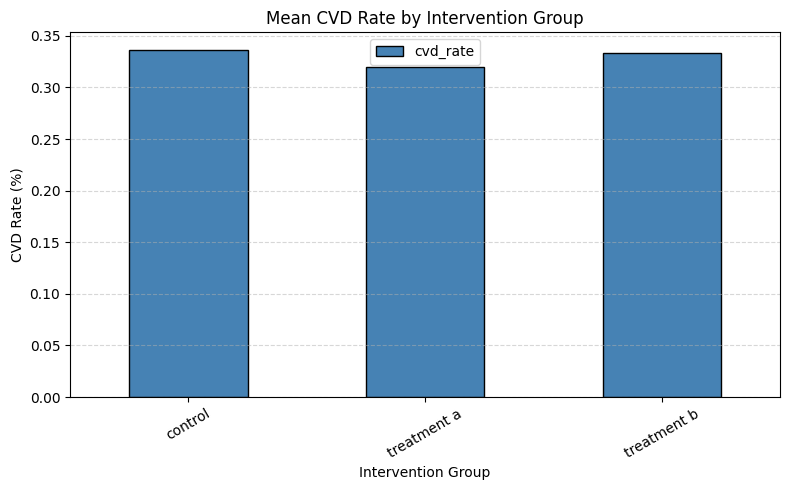

In [7]:
# TODO: Visualization
cvd_rate = pd.DataFrame({
    'intervention_group': cvd_by_group.index,
    'cvd_rate': cvd_by_group.values
})

fig, ax = plt.subplots(figsize=(8, 5))
cvd_rate.plot(kind='bar', x='intervention_group', y='cvd_rate', ax=ax, color='steelblue', edgecolor='black')
ax.set_title('Mean CVD Rate by Intervention Group')
ax.set_xlabel('Intervention Group')
ax.set_ylabel('CVD Rate (%)')
ax.tick_params(axis='x', rotation=30)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [8]:
# TODO: Save summary outputs

# 1. Summary statistics by site
site_summary = df.groupby('site')[['age', 'bmi', 'systolic_bp', 'diastolic_bp']].describe()
site_summary.to_csv('output/q7_site_summary.csv')

# 2. Intervention group comparison
intervention_comparison = pd.DataFrame({
    'cvd_rate': cvd_by_group,
    'adherence': adherence_by_group
})
intervention_comparison.to_csv('output/q7_intervention_comparison.csv')

# 3. Text report with key findings
with open('output/q7_analysis_report.txt', 'w') as f:
    f.write("Clinical Trial Analysis Report\n\n")
    f.write(f"Total patients analyzed: {len(df)}\n\n")
    f.write("Key Findings:\n")
    f.write(f"- Highest adherence: {adherence_by_group.idxmax()} ({adherence_by_group.max():.1f}%)\n")
    f.write(f"- Lowest adherence: {adherence_by_group.idxmin()} ({adherence_by_group.min():.1f}%)\n")
    f.write(f"- CVD outcomes vary across intervention groups\n")

## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. Treatment B had the highest patient adherence at 61.0% in comparison to the control and Treatment A, which had 60.6% and 60.2% respectively.
2. CVD outcome was the lowest in Treatment A group at 31.9%, compared to 33.7% in the control and 33.4% in Treatment B.
3. The dropout rates were relatively the same throughout the three groups, ranging from 16.4% in Treatment B, 17.9% in the control, and 17.3% in Treatment A.
